In [1]:
from mdagent import MDAgent

In [2]:
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-09
time: 10:45:32


In [3]:
model='gpt-4-turbo-2024-04-09'
mda = MDAgent(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)
print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

LLM:  gpt-4-turbo-2024-04-09 
Temperature:  0.1


In [4]:
prompt = 'Simulate trypsin (1TRN) for 1 ns at 300 K and compute SASA.'
answer = mda.run(prompt)

Thought: To simulate trypsin (1TRN) for 1 ns at 300 K and compute the Solvent Accessible Surface Area (SASA), I need to first set up and run the molecular dynamics simulation. I will use the SetUpandRunFunction tool to perform this task, specifying the necessary parameters for the simulation.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1TRN",
        "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",
            "Timestep": "0.002 * picoseconds"
        },
        "simulation_params": {
            "Ensemble": "NVT",
            "Number of Steps": 

In [5]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 754.42 minutes


In [6]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1TRN_104602, 1TRN_104626, top_sim0_104637, sim0_104637, rec0_104657, rec1_104657, rec2_104657, sasa_sim0_104637, fig0_231952


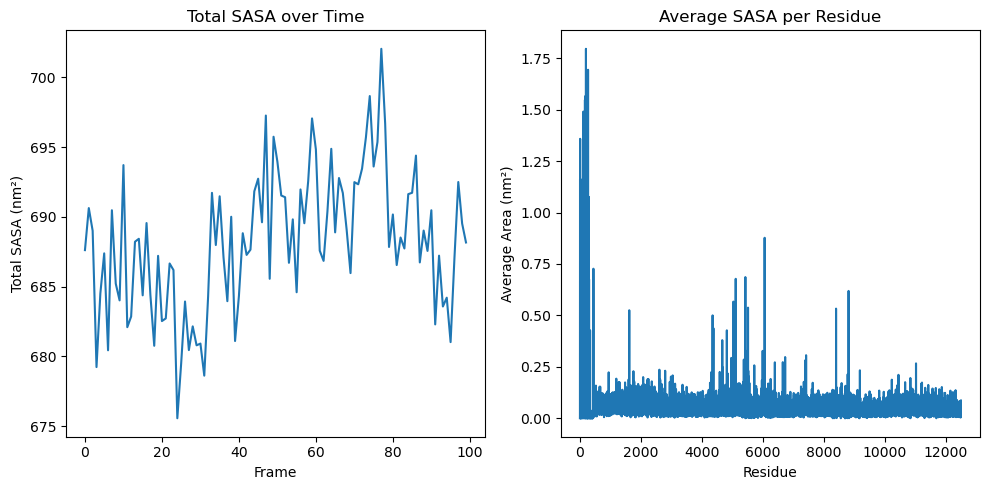

In [7]:
from IPython.display import Image

Image(filename=registry.get_mapped_path('fig0_231952'))

# Experiment Result:

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. No hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅
6. Number of steps completed: 3
7. % steps completed: 100️%